In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, QuantileTransformer  # StandardScaler for normalization, QuantileTransformer for non-Gaussian distributions
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

In [46]:
import pandas as pd

# Load the first 38 rows of the CSV file (NIH ids)
df = pd.read_csv('/Users/sanjaymandal/Downloads/count_10mer_180genome.csv', nrows=38,index_col=0)

# Display the DataFrame
df.head()

,AAAAAAAAAA,AAAAAAAAAC,AAAAAAAAAG,AAAAAAAAAT,AAAAAAAACA,AAAAAAAACC,AAAAAAAACG,AAAAAAAACT,AAAAAAAAGA,AAAAAAAAGC,...,TTTTAAAAAA,TTTTACAAAA,TTTTAGAAAA,TTTTATAAAA,TTTTCAAAAA,TTTTCCAAAA,TTTTCGAAAA,TTTTGAAAAA,TTTTGCAAAA,TTTTTAAAAA
NIH-003-1,46,10,18,6,3,34,14,5,6,28,...,0,1,2,1,7,5,3,2,3,0
NIH-004-1,38,16,7,5,9,27,13,5,7,29,...,0,1,3,3,7,3,3,4,0,0
NIH-004-2,168,21,8,9,11,29,13,5,7,29,...,1,1,3,3,7,3,3,5,0,1
NIH-004-3,45,17,7,2,8,26,14,6,6,30,...,0,1,3,3,7,3,3,4,0,0
NIH-004-4,54,20,11,5,14,27,15,6,9,31,...,1,1,3,3,7,3,3,4,0,0


In [47]:
# Using LEVO MIC data

df['MCInt']=[0,1,1,1,0,0,0,1,1,0,0,1,1,0,0,0,0,1,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]




In [48]:
X = df.drop('MCInt', axis=1) 
y = df['MCInt']

In [49]:
# Split data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42) # Adjust test_size and random_state
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42) # Split temp into validation and test

In [50]:
print("Training set size:", X_train.shape)
print("Validation set size:", X_val.shape)
print("Test set size:", X_test.shape)

Training set size: (26, 524385)
Validation set size: (6, 524385)
Test set size: (6, 524385)


In [51]:
scaler = StandardScaler() 

X_train = scaler.fit_transform(X_train)  # Fit on training data and transform
X_val = scaler.transform(X_val)  # Transform validation data using the same scaler
X_test = scaler.transform(X_test) # Transform test data

In [52]:
# Convert data to numpy arrays for TensorFlow/Keras
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

In [53]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define the baseline model
def create_baseline_model(input_shape):
    model = keras.Sequential([
        layers.Input(shape=(input_shape,)),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # Sigmoid for binary classification
    ])
    model.compile(optimizer='adam',
                  loss='binary_crossentropy', # Binary crossentropy for binary classification
                  metrics=['accuracy'])
    return model

# Get the input shape
input_shape = X_train.shape[1]

# Create the baseline model
baseline_model = create_baseline_model(input_shape)
baseline_model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_44 (Dense)                │ (None, 128)            │    67,121,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,129,729 (256.08 MB)

 Trainable params: 67,129,729 (256.08 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
#! pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.6/239.6 MB 53.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 79.1 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 68.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 64.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 405.1/405.1 kB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 67.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 339.2/339.2 kB 37.0 MB/s eta 0:00:00


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 653ms/step - accuracy: 0.6538 - loss: 0.6355 - val_accuracy: 0.8333 - val_loss: 22.6191 - learning_rate: 0.0010
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 606ms/step - accuracy: 0.6923 - loss: 77.7673 - val_accuracy: 0.6667 - val_loss: 169.0527 - learning_rate: 0.0010
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - accuracy: 0.9231 - loss: 37.2255 - val_accuracy: 0.5000 - val_loss: 172.2986 - learning_rate: 0.0010
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - accuracy: 0.9231 - loss: 28.9371 - val_accuracy: 0.6667 - val_loss: 99.0980 - learning_rate: 0.0010
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - accuracy: 0.8077 - loss: 6.2250 - val_accuracy: 0.6667 - val_loss: 83.0767 - learning_rate: 0.0010
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step - accuracy: 0.8846 - loss: 14.0306 - val_accuracy: 0.6667 - val_loss: 116.7248 - learning_rate: 0.0010
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - accuracy: 0.9231 - loss: 19.1025 - 

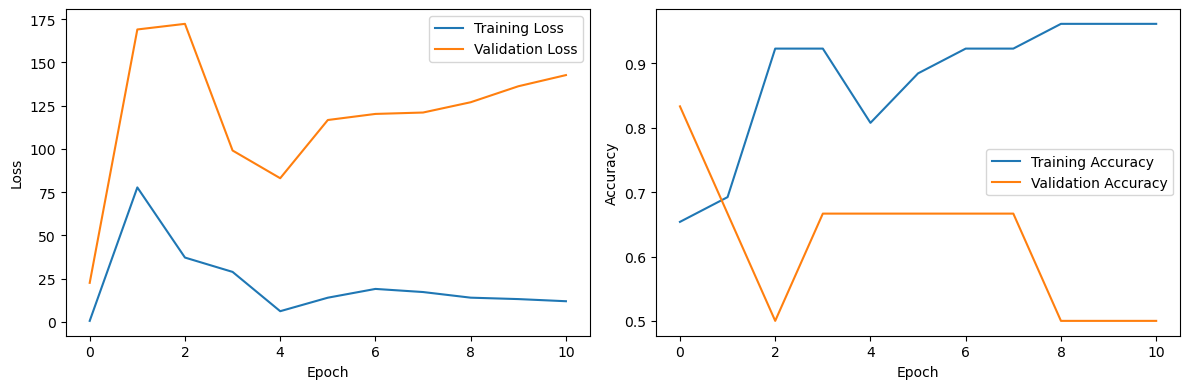

In [54]:
# Define callbacks for training
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True) # Stop training if validation loss doesn't improve
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001) # Reduce learning rate when validation loss plateaus

# Train the baseline model
history = baseline_model.fit(X_train, y_train,
                              epochs=50,  # Adjust the number of epochs
                              batch_size=32, # Adjust the batch size
                              validation_data=(X_val, y_val),
                              callbacks=[early_stopping, reduce_lr],
                              verbose=1) # Set verbose=0 for less output

# Evaluate the baseline model on the test set
_, baseline_accuracy = baseline_model.evaluate(X_test, y_test, verbose=0)
print("Baseline Accuracy: {:.4f}".format(baseline_accuracy))

# Make predictions on the test set
y_pred_baseline = baseline_model.predict(X_test)
y_pred_baseline = (y_pred_baseline > 0.5).astype(int) # Convert probabilities to binary predictions (0 or 1)

# Print classification report for more detailed evaluation
print("Classification Report (Baseline):\n", classification_report(y_test, y_pred_baseline))

# Plot training history (loss and accuracy)
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [16]:
def create_model_with_lr(input_shape, learning_rate=0.001):
    model = keras.Sequential([
        layers.Input(shape=(input_shape,)),
      layers.Dense(128, activation='relu'),
       layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate) # Set the learning rate
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

learning_rates = [0.01, 0.001, 0.0001]
for lr in learning_rates:
    print(f"Training with learning rate: {lr}")
    model_lr = create_model_with_lr(input_shape, learning_rate=lr)
    history_lr = model_lr.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping, reduce_lr], verbose=0)
    _, accuracy_lr = model_lr.evaluate(X_test, y_test, verbose=0)
    print(f"Accuracy with learning rate {lr}: {accuracy_lr:.4f}")

Training with learning rate: 0.01
Accuracy with learning rate 0.01: 0.6667
Training with learning rate: 0.001
Accuracy with learning rate 0.001: 0.3333
Training with learning rate: 0.0001
Accuracy with learning rate 0.0001: 0.6667


In [18]:
def create_deeper_model(input_shape):
    model = keras.Sequential([
        layers.Input(shape=(input_shape,)),
       layers.Dense(256, activation='relu'),
        layers.Dense(128, activation='relu'),
       layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

deeper_model = create_deeper_model(input_shape)
history_deeper = deeper_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping, reduce_lr], verbose=0)
_, accuracy_deeper = deeper_model.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy with deeper model: {accuracy_deeper:.4f}")

Accuracy with deeper model: 0.6667


In [55]:
def create_model_with_dropout(input_shape, dropout_rate=0.2):
    model = keras.Sequential([
        layers.Input(shape=(input_shape,)),
        layers.Dense(128, activation='relu'),
        layers.Dropout(dropout_rate), # Add dropout layer
        layers.Dense(64, activation='relu'),
        layers.Dropout(dropout_rate), # Add dropout layer
        layers.Dense(1, activation='sigmoid')
     ])
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

model_dropout = create_model_with_dropout(input_shape)
history_dropout = model_dropout.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping, reduce_lr], verbose=0)
_, accuracy_dropout = model_dropout.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy with dropout: {accuracy_dropout:.4f}")

# **Example 4: L1/L2 Regularization**
#  Add L1 or L2 regularization to the dense layers.

from tensorflow.keras import regularizers

def create_model_with_l2_regularization(input_shape, l2_lambda=0.01):
    model = keras.Sequential([
         layers.Input(shape=(input_shape,)),
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(l2_lambda)), # Add L2 regularization
        layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(l2_lambda)), # Add L2 regularization
         layers.Dense(1, activation='sigmoid')
     ])
    model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])
    return model

model_l2 = create_model_with_l2_regularization(input_shape)
history_l2 = model_l2.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping, reduce_lr], verbose=0)
_, accuracy_l2 = model_l2.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy with L2 regularization: {accuracy_l2:.4f}")

Accuracy with dropout: 0.6667
Accuracy with L2 regularization: 0.6667


In [27]:
def create_model_with_activation(input_shape, activation='relu'):
    model = keras.Sequential([
         layers.Input(shape=(input_shape,)),
         layers.Dense(128, activation=activation),
         layers.Dense(64, activation=activation),
         layers.Dense(1, activation='sigmoid')
     ])
    model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])
    return model

activations = ['relu', 'tanh', 'elu']
for act in activations:
     print(f"Training with activation: {act}")
     model_act = create_model_with_activation(input_shape, activation=act)
     history_act = model_act.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping, reduce_lr], verbose=0)
     _, accuracy_act = model_act.evaluate(X_test, y_test, verbose=0)
     print(f"Accuracy with activation {act}: {accuracy_act:.4f}")

Training with activation: relu
Accuracy with activation relu: 0.6667
Training with activation: tanh
Accuracy with activation tanh: 0.5000
Training with activation: elu
Accuracy with activation elu: 0.6667


In [32]:
def create_model_with_sgd(input_shape, learning_rate=0.01, momentum=0.9):
    model = keras.Sequential([
         layers.Input(shape=(input_shape,)),
         layers.Dense(128, activation='relu'),
         layers.Dense(64, activation='relu'),
         layers.Dense(1, activation='sigmoid')
     ])
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum)
    model.compile(optimizer=optimizer,
                   loss='binary_crossentropy',
                   metrics=['accuracy'])
    return model

model_sgd = create_model_with_sgd(input_shape)
history_sgd = model_sgd.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping, reduce_lr], verbose=0)
_, accuracy_sgd = model_sgd.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy with SGD: {accuracy_sgd:.4f}")

Accuracy with SGD: 0.5000


In [36]:
def augment_data(X, y, num_augmentations=1000, noise_level=0.01):
    X_augmented = []
    y_augmented = []
    for i in range(num_augmentations):
        # Randomly select an existing sample
        idx = np.random.randint(0, len(X))
        x_sample = X[idx].copy() # Create a copy to avoid modifying the original data
        y_sample = y[idx]

#         # Add small random noise to the features
        noise = np.random.normal(0, noise_level, size=x_sample.shape)
        x_sample += noise

        X_augmented.append(x_sample)
        y_augmented.append(y_sample)

    X_augmented = np.array(X_augmented)
    y_augmented = np.array(y_augmented)

    return np.concatenate([X, X_augmented]), np.concatenate([y, y_augmented])

X_train_augmented, y_train_augmented = augment_data(X_train, y_train)
print("Augmented Training set size:", X_train_augmented.shape)

#  Retrain your model with the augmented data:
history_augmented = model.fit(X_train_augmented, y_train_augmented, epochs=50, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping, reduce_lr], verbose=0)
_, accuracy_augmented = model.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy with Data Augmentation: {accuracy_augmented:.4f}")

Augmented Training set size: (1026, 524385)


NameError: name 'model' is not defined